This notebook will be to compare to the average stats/shots_gained_total from the tournaments with weather data year over year. I have made a notebook that found the specific days that had exceptionally bad weather. I have also created a csv that had all the weather data without missing values. Grouping by location and year, I will be able to pick out average performance for each tournament. I will see if the weather changed the average scores of the tournament compared to other years. 

In [1]:
import pandas as pd

In [2]:
import getpass
import pandas.io.sql as psql
mypasswd = getpass.getpass()
username = 'sebmb'
host = 'pgsql.dsa.lan'
database = 'casestdysu22t06'

········


In [3]:
from sqlalchemy.engine.url import URL
from sqlalchemy import create_engine
from sqlalchemy import select

# SQLAlchemy Connection Parameters
postgres_db = {'drivername': 'postgres',
               'username': username,
               'password': mypasswd,
               'host': host,
               'database' :database}
engine = create_engine(URL(**postgres_db), echo=True)
del mypasswd

In [4]:
wdf = psql.read_sql('''SELECT t.tournament_id, td.date, t.player_id, p.player, td.course, td.tournament,
t.year, t.purse, t.score, t.par, t.rounds, t.shots_gained_putt, t.shots_gained_around_green, 
t.shots_gained_approach_green, t.shots_gained_off_the_tee,
t.shots_gained_tee_to_green, t.shots_gained_total, t.cut, t.top10, w.fmax, w.fmin, 
w.wind_mph, w.prcp_mm
FROM tournament_table t JOIN tourney_dates td ON t.tournament_id=td.tournament_id
JOIN player_table p ON t.player_id = p.player_id
JOIN streak_table s ON t.tournament_id = s.tournament_id AND t.player_id = s.player_id AND td.date = s.date
LEFT JOIN weather_table w ON td.date = w.date
ORDER BY date,player;''', engine)

2022-07-19 13:17:11,604 INFO sqlalchemy.engine.base.Engine select version()
2022-07-19 13:17:11,605 INFO sqlalchemy.engine.base.Engine {}
2022-07-19 13:17:11,608 INFO sqlalchemy.engine.base.Engine select current_schema()
2022-07-19 13:17:11,608 INFO sqlalchemy.engine.base.Engine {}
2022-07-19 13:17:11,610 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2022-07-19 13:17:11,611 INFO sqlalchemy.engine.base.Engine {}
2022-07-19 13:17:11,613 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2022-07-19 13:17:11,613 INFO sqlalchemy.engine.base.Engine {}
2022-07-19 13:17:11,615 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2022-07-19 13:17:11,615 INFO sqlalchemy.engine.base.Engine {}
2022-07-19 13:17:11,617 INFO sqlalchemy.engine.base.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
20

In [5]:
wdf = wdf.drop_duplicates(['tournament_id','date','player_id'])

In [6]:
wdf.shape

(35524, 23)

In [7]:
wdf.head()

,tournament_id,date,player_id,player,course,tournament,year,purse,score,par,...,shots_gained_approach_green,shots_gained_off_the_tee,shots_gained_tee_to_green,shots_gained_total,cut,top10,fmax,fmin,wind_mph,prcp_mm
0,2271,2014-10-12,16,Aaron Baddeley,"Silverado Resort - Napa, CA",Frys.com Open,2015,6.0,283,288,...,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN
1,2271,2014-10-12,5548,Adam Hadwin,"Silverado Resort - Napa, CA",Frys.com Open,2015,6.0,286,288,...,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN
2,2271,2014-10-12,512,Alex Cejka,"Silverado Resort - Napa, CA",Frys.com Open,2015,6.0,149,144,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,2271,2014-10-12,1748,Andres Gonzales,"Silverado Resort - Napa, CA",Frys.com Open,2015,6.0,282,288,...,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN
4,2271,2014-10-12,1712,Andres Romero,"Silverado Resort - Napa, CA",Frys.com Open,2015,6.0,149,144,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [8]:
augusta = wdf[wdf['course']=='Augusta National Golf Club - Augusta, GA']

In [9]:
augusta.shape

(576, 23)

In [10]:
augusta.head()
#missing shots gained metric but still has score/par

,tournament_id,date,player_id,player,course,tournament,year,purse,score,par,...,shots_gained_approach_green,shots_gained_off_the_tee,shots_gained_tee_to_green,shots_gained_total,cut,top10,fmax,fmin,wind_mph,prcp_mm
2061,2241,2015-04-12,388,Adam Scott,"Augusta National Golf Club - Augusta, GA",Masters Tournament,2015,10.0,289,288,...,NaN,NaN,NaN,NaN,1,0,77.0,63.0,9.0,0.0
2062,2241,2015-04-12,4989,Anirban Lahiri,"Augusta National Golf Club - Augusta, GA",Masters Tournament,2015,10.0,292,288,...,NaN,NaN,NaN,NaN,1,0,77.0,63.0,9.0,0.0
2063,2241,2015-04-12,693,Ben Crane,"Augusta National Golf Club - Augusta, GA",Masters Tournament,2015,10.0,157,144,...,NaN,NaN,NaN,NaN,0,0,77.0,63.0,9.0,0.0
2064,2241,2015-04-12,4638,Ben Martin,"Augusta National Golf Club - Augusta, GA",Masters Tournament,2015,10.0,148,144,...,NaN,NaN,NaN,NaN,0,0,77.0,63.0,9.0,0.0
2065,2241,2015-04-12,4317,Bernd Wiesberger,"Augusta National Golf Club - Augusta, GA",Masters Tournament,2015,10.0,286,288,...,NaN,NaN,NaN,NaN,1,0,77.0,63.0,9.0,0.0


In [11]:
ponte_vedra = wdf[wdf['course']=='TPC Sawgrass - Ponte Vedra Beach, FL']

In [12]:
ponte_vedra.shape

(988, 23)

In [13]:
hilton_head = wdf[wdf['course']=='Harbour Town Golf Links - Hilton Head Island, SC']

In [14]:
hilton_head.shape

(887, 23)

In [15]:
la_jolla = wdf[wdf['course']=='Torrey Pines North - La Jolla, CA']

In [16]:
la_jolla.shape

(1120, 23)

In [17]:
scottsdale = wdf[wdf['course']=='TPC Scottsdale - Scottsdale, AZ']

In [18]:
scottsdale.shape

(990, 23)

In [19]:
wdf1 = wdf.dropna()

In [20]:
wdf1.shape
#this is the weather data with tournament location

(4321, 23)

In [21]:
wdf1.head()

,tournament_id,date,player_id,player,course,tournament,year,purse,score,par,...,shots_gained_approach_green,shots_gained_off_the_tee,shots_gained_tee_to_green,shots_gained_total,cut,top10,fmax,fmin,wind_mph,prcp_mm
899,2232,2015-02-01,16,Aaron Baddeley,"TPC Scottsdale - Scottsdale, AZ",Waste Management Phoenix Open,2015,6.3,276,284,...,0.32,-0.62,-0.20,1.53,1,0,68.0,47.0,1.0,0.0
900,2232,2015-02-01,5548,Adam Hadwin,"TPC Scottsdale - Scottsdale, AZ",Waste Management Phoenix Open,2015,6.3,149,142,...,-0.43,-0.37,-1.11,-3.14,0,0,68.0,47.0,1.0,0.0
901,2232,2015-02-01,1712,Andres Romero,"TPC Scottsdale - Scottsdale, AZ",Waste Management Phoenix Open,2015,6.3,144,142,...,-0.15,-0.19,-1.17,-0.64,0,0,68.0,47.0,1.0,0.0
902,2232,2015-02-01,5951,Andrew Loupe,"TPC Scottsdale - Scottsdale, AZ",Waste Management Phoenix Open,2015,6.3,147,142,...,-0.52,0.70,-0.21,-2.14,0,0,68.0,47.0,1.0,0.0
903,2232,2015-02-01,693,Ben Crane,"TPC Scottsdale - Scottsdale, AZ",Waste Management Phoenix Open,2015,6.3,148,142,...,-2.02,0.16,-1.94,-2.64,0,0,68.0,47.0,1.0,0.0


In [22]:
scottsdale = wdf1[wdf1['course']=='TPC Scottsdale - Scottsdale, AZ']

In [23]:
scottsdale.shape

(987, 23)

In [24]:
la_jolla = wdf1[wdf1['course']=='Torrey Pines North - La Jolla, CA']

In [25]:
la_jolla.shape

(1112, 23)

In [26]:
hilton_head = wdf1[wdf1['course']=='Harbour Town Golf Links - Hilton Head Island, SC']

In [27]:
hilton_head.shape

(884, 23)

In [28]:
ponte_vedra = wdf1[wdf1['course']=='TPC Sawgrass - Ponte Vedra Beach, FL']

In [29]:
ponte_vedra.shape

(983, 23)

In [30]:
augusta1 = wdf1[wdf1['course']=='Augusta National Golf Club - Augusta, GA']
#no shots gained metrics in augusta tournaments will have to just use score/par for exploration

In [31]:
augusta1.shape

(0, 23)

In [32]:
#every other tournament only loses a couple of rows when removing NA columns

In [33]:
scottsdale.head()
#i will take the average score/par/SG metrics for each year then compare with my data that filtered for bad weather
#if that tournament has noticable differences in the averages for that year, maybe it is worth looking further into

,tournament_id,date,player_id,player,course,tournament,year,purse,score,par,...,shots_gained_approach_green,shots_gained_off_the_tee,shots_gained_tee_to_green,shots_gained_total,cut,top10,fmax,fmin,wind_mph,prcp_mm
899,2232,2015-02-01,16,Aaron Baddeley,"TPC Scottsdale - Scottsdale, AZ",Waste Management Phoenix Open,2015,6.3,276,284,...,0.32,-0.62,-0.20,1.53,1,0,68.0,47.0,1.0,0.0
900,2232,2015-02-01,5548,Adam Hadwin,"TPC Scottsdale - Scottsdale, AZ",Waste Management Phoenix Open,2015,6.3,149,142,...,-0.43,-0.37,-1.11,-3.14,0,0,68.0,47.0,1.0,0.0
901,2232,2015-02-01,1712,Andres Romero,"TPC Scottsdale - Scottsdale, AZ",Waste Management Phoenix Open,2015,6.3,144,142,...,-0.15,-0.19,-1.17,-0.64,0,0,68.0,47.0,1.0,0.0
902,2232,2015-02-01,5951,Andrew Loupe,"TPC Scottsdale - Scottsdale, AZ",Waste Management Phoenix Open,2015,6.3,147,142,...,-0.52,0.70,-0.21,-2.14,0,0,68.0,47.0,1.0,0.0
903,2232,2015-02-01,693,Ben Crane,"TPC Scottsdale - Scottsdale, AZ",Waste Management Phoenix Open,2015,6.3,148,142,...,-2.02,0.16,-1.94,-2.64,0,0,68.0,47.0,1.0,0.0


Filter for the tournaments with weather data. Group the filtered data by location to get the average score for all years of the tournament. This is the baseline expectation for how the average player will play at each tournament. 

In [58]:
filter_list = ['Torrey Pines North - La Jolla, CA',
              'Harbour Town Golf Links - Hilton Head Island, SC',
              'Augusta National Golf Club - Augusta, GA']
wdf_filt = wdf[wdf['course'].isin(filter_list)]

In [59]:
wdf_filt.dtypes

tournament_id                    int64
date                            object
player_id                        int64
player                          object
course                          object
tournament                      object
year                            object
purse                          float64
score                            int64
par                              int64
rounds                           int64
shots_gained_putt              float64
shots_gained_around_green      float64
shots_gained_approach_green    float64
shots_gained_off_the_tee       float64
shots_gained_tee_to_green      float64
shots_gained_total             float64
cut                              int64
top10                            int64
fmax                           float64
fmin                           float64
wind_mph                       float64
prcp_mm                        float64
dtype: object

In [60]:
avg_score = wdf_filt.groupby(['course']).agg({'score':['mean']})

In [61]:
avg_score = avg_score.reset_index()

In [62]:
avg_score.head()

,course,score
,,mean
0,"Augusta National Golf Club - Augusta, GA",241.782986
1,"Harbour Town Golf Links - Hilton Head Island, SC",219.413754
2,"Torrey Pines North - La Jolla, CA",217.968750


In [63]:
avg_score.columns = avg_score.columns.droplevel(1)

In [64]:
avg_score = avg_score.rename(columns = {'score':'score_avg'})

In [65]:
avg_score.dtypes

course        object
score_avg    float64
dtype: object

In [66]:
wdf_filt = wdf_filt.merge(avg_score, on='course')

Now that I have average scores for each tournament across all years, I will group by year and find the average performance for each year. I will create a column that displays the differences in scores between all years and year over year performance. I will call that column score_margin. The larger the score margin, the further from average the players played on that given year. A positive point margin indicates they played worse than average and a negative point margin means they played better. This is golf, so the lower the score the better.

In [67]:
avg_scores_by_year = wdf_filt.groupby(['course','year']).agg({'score':['mean'],'par':['mean'],
                    'fmax':['max'],'wind_mph':['max'],'prcp_mm':['max'],
                    'shots_gained_putt':['mean'],'shots_gained_around_green':['mean'],
                    'shots_gained_approach_green':['mean'],'shots_gained_off_the_tee':['mean'],
                    'shots_gained_tee_to_green':['mean'], 'shots_gained_total':['mean'], 'score_avg':['mean']})

In [68]:
avg_scores_by_year = avg_scores_by_year.reset_index()

In [69]:
avg_scores_by_year

,course,year,score,par,fmax,wind_mph,prcp_mm,shots_gained_putt,shots_gained_around_green,shots_gained_approach_green,shots_gained_off_the_tee,shots_gained_tee_to_green,shots_gained_total,score_avg
,,,mean,mean,max,max,max,mean,mean,mean,mean,mean,mean,mean
0,"Augusta National Golf Club - Augusta, GA",2015,237.291139,236.962025,77.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,241.782986
1,"Augusta National Golf Club - Augusta, GA",2016,248.000000,240.631579,64.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,241.782986
2,"Augusta National Golf Club - Augusta, GA",2017,238.197531,232.888889,78.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,241.782986
3,"Augusta National Golf Club - Augusta, GA",2018,242.582278,240.607595,60.0,7.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,241.782986
4,"Augusta National Golf Club - Augusta, GA",2019,255.402439,256.390244,79.0,12.0,2.8,NaN,NaN,NaN,NaN,NaN,NaN,241.782986
5,"Augusta National Golf Club - Augusta, GA",2021,236.156425,234.905028,80.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,241.782986
6,"Harbour Town Golf Links - Hilton Head Island, SC",2015,231.694444,234.037037,78.0,3.0,18.3,-0.063551,0.029346,-0.073738,-0.042243,-0.086636,-0.150374,219.413754
7,"Harbour Town Golf Links - Hilton Head Island, SC",2016,227.833333,224.210526,74.0,7.0,0.0,-0.161491,0.028158,-0.176140,-0.125175,-0.273684,-0.436228,219.413754
8,"Harbour Town Golf Links - Hilton Head Island, SC",2017,220.768000,222.088000,79.0,5.0,0.0,-0.094194,-0.029919,-0.103306,-0.067984,-0.201290,-0.297097,219.413754


In [46]:
#i noticed that the years that hilton head has a lot of rain, the average score
#and par are up from the other years

In [47]:
#i am going to take the average score for the course and make a column displaying the difference for each year
#compared to the course average

In [72]:
avg_scores_by_year['score_margin'] = avg_scores_by_year['score'] - avg_scores_by_year['score_avg']

In [73]:
avg_scores_by_year

,course,year,score,par,fmax,wind_mph,prcp_mm,shots_gained_putt,shots_gained_around_green,shots_gained_approach_green,shots_gained_off_the_tee,shots_gained_tee_to_green,shots_gained_total,score_avg,score_margin
,,,mean,mean,max,max,max,mean,mean,mean,mean,mean,mean,mean,
0,"Augusta National Golf Club - Augusta, GA",2015,237.291139,236.962025,77.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,241.782986,-4.491847
1,"Augusta National Golf Club - Augusta, GA",2016,248.000000,240.631579,64.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,241.782986,6.217014
2,"Augusta National Golf Club - Augusta, GA",2017,238.197531,232.888889,78.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,241.782986,-3.585455
3,"Augusta National Golf Club - Augusta, GA",2018,242.582278,240.607595,60.0,7.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,241.782986,0.799292
4,"Augusta National Golf Club - Augusta, GA",2019,255.402439,256.390244,79.0,12.0,2.8,NaN,NaN,NaN,NaN,NaN,NaN,241.782986,13.619453
5,"Augusta National Golf Club - Augusta, GA",2021,236.156425,234.905028,80.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,241.782986,-5.626562
6,"Harbour Town Golf Links - Hilton Head Island, SC",2015,231.694444,234.037037,78.0,3.0,18.3,-0.063551,0.029346,-0.073738,-0.042243,-0.086636,-0.150374,219.413754,12.280690
7,"Harbour Town Golf Links - Hilton Head Island, SC",2016,227.833333,224.210526,74.0,7.0,0.0,-0.161491,0.028158,-0.176140,-0.125175,-0.273684,-0.436228,219.413754,8.419579
8,"Harbour Town Golf Links - Hilton Head Island, SC",2017,220.768000,222.088000,79.0,5.0,0.0,-0.094194,-0.029919,-0.103306,-0.067984,-0.201290,-0.297097,219.413754,1.354246


In [74]:
top_point_diff = avg_scores_by_year.sort_values(by='score_margin')

In [109]:
top_point_diff

,course,year,score,par,fmax,wind_mph,prcp_mm,shots_gained_putt,shots_gained_around_green,shots_gained_approach_green,shots_gained_off_the_tee,shots_gained_tee_to_green,shots_gained_total,score_avg,score_margin
,,,mean,mean,max,max,max,mean,mean,mean,mean,mean,mean,mean,
11,"Harbour Town Golf Links - Hilton Head Island, SC",2020,206.496689,212.059603,92.0,4.0,0.0,-0.133974,-0.037881,-0.160132,-0.092914,-0.291987,-0.426159,219.413754,-12.917065
12,"Harbour Town Golf Links - Hilton Head Island, SC",2021,208.857143,210.864662,82.0,6.0,0.0,-0.156541,-0.043609,-0.156917,-0.088647,-0.289699,-0.446165,219.413754,-10.556611
5,"Augusta National Golf Club - Augusta, GA",2021,236.156425,234.905028,80.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,241.782986,-5.626562
17,"Torrey Pines North - La Jolla, CA",2019,213.210526,215.993421,65.0,4.0,0.0,-0.250921,-0.090987,-0.184013,-0.074934,-0.350000,-0.601118,217.968750,-4.758224
0,"Augusta National Golf Club - Augusta, GA",2015,237.291139,236.962025,77.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,241.782986,-4.491847
2,"Augusta National Golf Club - Augusta, GA",2017,238.197531,232.888889,78.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,241.782986,-3.585455
19,"Torrey Pines North - La Jolla, CA",2021,215.428571,214.564935,69.0,2.0,0.0,-0.253311,-0.161722,-0.197748,-0.062384,-0.422119,-0.675364,217.968750,-2.540179
10,"Harbour Town Golf Links - Hilton Head Island, SC",2019,218.453846,217.915385,73.0,8.0,0.0,-0.148077,-0.058231,-0.137769,-0.074846,-0.269154,-0.413308,219.413754,-0.959908
15,"Torrey Pines North - La Jolla, CA",2017,217.588235,217.588235,77.0,3.0,0.0,-0.175185,-0.046963,-0.147111,-0.102370,-0.296296,-0.471259,217.968750,-0.380515


In [76]:
top_point_diff[top_point_diff['course']=='Harbour Town Golf Links - Hilton Head Island, SC']

,course,year,score,par,fmax,wind_mph,prcp_mm,shots_gained_putt,shots_gained_around_green,shots_gained_approach_green,shots_gained_off_the_tee,shots_gained_tee_to_green,shots_gained_total,score_avg,score_margin
,,,mean,mean,max,max,max,mean,mean,mean,mean,mean,mean,mean,
11,"Harbour Town Golf Links - Hilton Head Island, SC",2020,206.496689,212.059603,92.0,4.0,0.0,-0.133974,-0.037881,-0.160132,-0.092914,-0.291987,-0.426159,219.413754,-12.917065
12,"Harbour Town Golf Links - Hilton Head Island, SC",2021,208.857143,210.864662,82.0,6.0,0.0,-0.156541,-0.043609,-0.156917,-0.088647,-0.289699,-0.446165,219.413754,-10.556611
10,"Harbour Town Golf Links - Hilton Head Island, SC",2019,218.453846,217.915385,73.0,8.0,0.0,-0.148077,-0.058231,-0.137769,-0.074846,-0.269154,-0.413308,219.413754,-0.959908
8,"Harbour Town Golf Links - Hilton Head Island, SC",2017,220.768000,222.088000,79.0,5.0,0.0,-0.094194,-0.029919,-0.103306,-0.067984,-0.201290,-0.297097,219.413754,1.354246
9,"Harbour Town Golf Links - Hilton Head Island, SC",2018,227.539683,228.214286,80.0,12.0,26.9,-0.106800,-0.045840,-0.167760,-0.075440,-0.288320,-0.394160,219.413754,8.125928
7,"Harbour Town Golf Links - Hilton Head Island, SC",2016,227.833333,224.210526,74.0,7.0,0.0,-0.161491,0.028158,-0.176140,-0.125175,-0.273684,-0.436228,219.413754,8.419579
6,"Harbour Town Golf Links - Hilton Head Island, SC",2015,231.694444,234.037037,78.0,3.0,18.3,-0.063551,0.029346,-0.073738,-0.042243,-0.086636,-0.150374,219.413754,12.280690


In [53]:
#most of the largest margins come from hilton head 


In [54]:
import seaborn as sns

In [55]:
# round_per_map = sns.catplot(x='Map', hue='Winner', col='SeriesId', data=game_sum, kind='count')
# round_per_map

This bar chart shows the point margins over the years for each course. Hilton Head and Augusta show more change than other tournaments. Specifically the large spikes in a few of the years. I will look back at the weather and see if there was any notable weather that played a factor on those years.

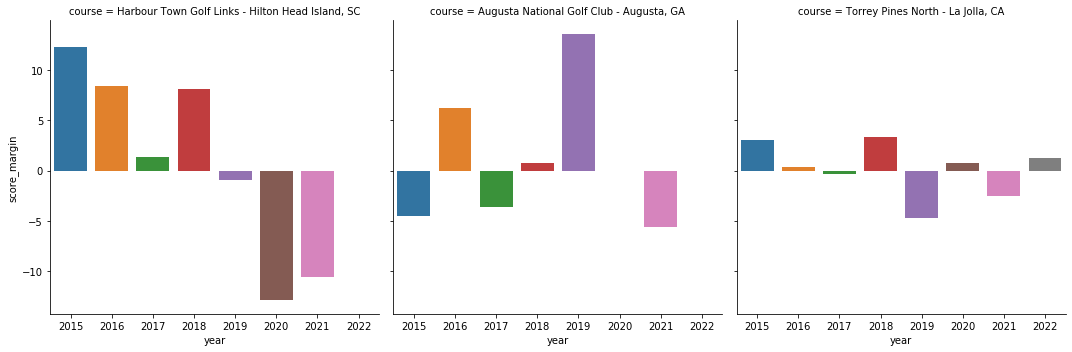

In [77]:
point_margins = sns.catplot(x='year',y='score_margin',col='course', data=top_point_diff, kind='bar')
point_margins

In [110]:
top_point_diff.columns.droplevel(1)

Index(['course', 'year', 'score', 'par', 'fmax', 'wind_mph', 'prcp_mm',
       'shots_gained_putt', 'shots_gained_around_green',
       'shots_gained_approach_green', 'shots_gained_off_the_tee',
       'shots_gained_tee_to_green', 'shots_gained_total', 'score_avg',
       'score_margin'],
      dtype='object')

In [118]:
top_point_diff1 = top_point_diff
top_point_diff1.columns = top_point_diff.columns.droplevel(1)
top_point_diff1

,course,year,score,par,fmax,wind_mph,prcp_mm,shots_gained_putt,shots_gained_around_green,shots_gained_approach_green,shots_gained_off_the_tee,shots_gained_tee_to_green,shots_gained_total,score_avg,score_margin
11,"Harbour Town Golf Links - Hilton Head Island, SC",2020,206.496689,212.059603,92.0,4.0,0.0,-0.133974,-0.037881,-0.160132,-0.092914,-0.291987,-0.426159,219.413754,-12.917065
12,"Harbour Town Golf Links - Hilton Head Island, SC",2021,208.857143,210.864662,82.0,6.0,0.0,-0.156541,-0.043609,-0.156917,-0.088647,-0.289699,-0.446165,219.413754,-10.556611
5,"Augusta National Golf Club - Augusta, GA",2021,236.156425,234.905028,80.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,241.782986,-5.626562
17,"Torrey Pines North - La Jolla, CA",2019,213.210526,215.993421,65.0,4.0,0.0,-0.250921,-0.090987,-0.184013,-0.074934,-0.350000,-0.601118,217.968750,-4.758224
0,"Augusta National Golf Club - Augusta, GA",2015,237.291139,236.962025,77.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,241.782986,-4.491847
2,"Augusta National Golf Club - Augusta, GA",2017,238.197531,232.888889,78.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,241.782986,-3.585455
19,"Torrey Pines North - La Jolla, CA",2021,215.428571,214.564935,69.0,2.0,0.0,-0.253311,-0.161722,-0.197748,-0.062384,-0.422119,-0.675364,217.968750,-2.540179
10,"Harbour Town Golf Links - Hilton Head Island, SC",2019,218.453846,217.915385,73.0,8.0,0.0,-0.148077,-0.058231,-0.137769,-0.074846,-0.269154,-0.413308,219.413754,-0.959908
15,"Torrey Pines North - La Jolla, CA",2017,217.588235,217.588235,77.0,3.0,0.0,-0.175185,-0.046963,-0.147111,-0.102370,-0.296296,-0.471259,217.968750,-0.380515
14,"Torrey Pines North - La Jolla, CA",2016,218.328244,214.893130,56.0,14.0,0.0,-0.170923,-0.094538,-0.107538,-0.048692,-0.251385,-0.422615,217.968750,0.359494


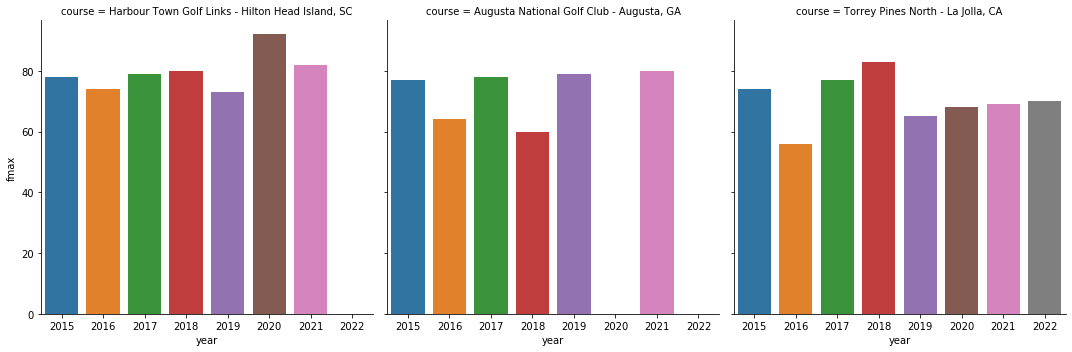

In [120]:
fmax_margins = sns.catplot(x='year',y='fmax',col='course', data=top_point_diff1, kind='bar')

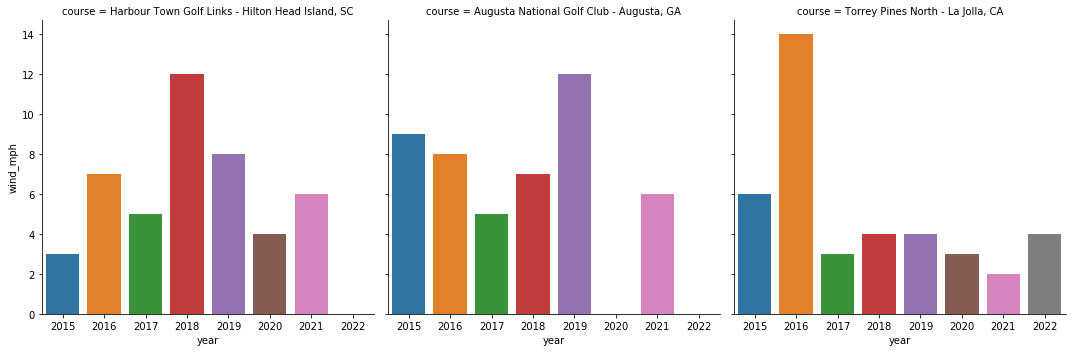

In [121]:
wind_margins = sns.catplot(x='year',y='wind_mph',col='course', data=top_point_diff1, kind='bar')

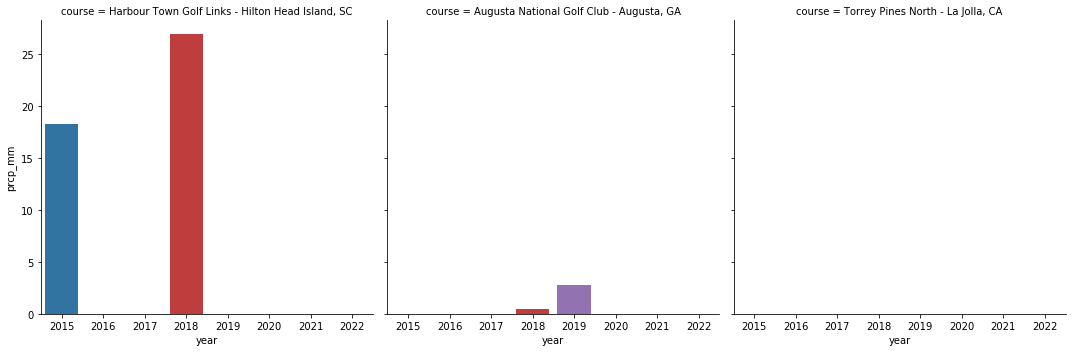

In [122]:
rain_margins = sns.catplot(x='year',y='prcp_mm',col='course', data=top_point_diff1, kind='bar')

In [57]:
#the higher the point margin, the worse the player played compared to average that year
#I notice big swings at hilton head and more minor swings in scottsdale
#the largest difference is in augusta in 2019 where the players played much worse than every other year
#weather indicates some rain and wind, but not much more than other tournaments
#data missing for augusta 2020 and sawgrass 2020 most likely covid related for data not to be in dataset

#2020 and 2021 hilton head had the best performances compared to the average tournament at hilton head 
#these years had good weather, low wind and rain compared to other years at hilton head

#weather seems to make a significant difference at hilton head. when the weather if favorable, the player play better
#than average by 8-12 points while in bad weather, the player play 8-12 points worse than average. That is a 24 point
#skew from good to bad weather at hilton head

#other tournaments do not show as much change based on weather, but hilton head is on an island, so the weather
#conditions are probably more drastic and can affect the player's scores.